In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

/home/aabreu/software/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from astropy.utils.data import download_file

In [3]:
from astropy.io import fits

In [20]:
image_file = '../datasets/sif_bam_example.fits'

In [21]:
hdu_list = fits.open(image_file)
hdu_list.info()
# Gaia SM images are binned by 2 in AC direction( hence AC dim = 990 )
# Gaia SM images are binned by 2 in AL direction( hence AL dim = 2543 )

Filename: ../datasets/sif_bam_example.fits
No.    Name         Type      Cards   Dimensions   Format
  0  RAW_SAMPLES  PrimaryHDU      20   (162, 65524)   int16 (rescales to uint16)   
  1  AC_COORDINATES  ImageHDU        11   (162, 65524)   int16   
  2  AC_BINNING  ImageHDU        11   (162, 65524)   int16   
  3  TDI_TTAG    ImageHDU         9   (65524,)   int64   
  4  CI_BIT      ImageHDU         9   (65524,)   uint8   
  5  TDI_GATE    ImageHDU         9   (65524,)   int16   
  6  IDLE_BIT    ImageHDU         9   (65524,)   uint8   
  7  TEST_PATTERN_BIT  ImageHDU         9   (65524,)   uint8   
  8  OPEXIT_BIT  ImageHDU         9   (65524,)   uint8   
  9  STATUS_BIT  ImageHDU         9   (65524,)   int32   
 10  OBMT        ImageHDU         9   (65524,)   int64   


In [22]:
image_data = hdu_list[0].data

In [23]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(65524, 162)


In [24]:
hdu_list.close()

/home/aabreu/software/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


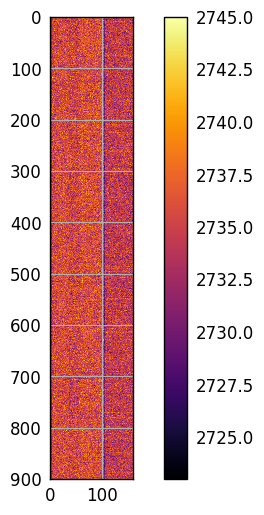

In [36]:
from matplotlib.colors import LogNorm
# Select the last n TDI lines 
nlines=900
plt.imshow(image_data[-nlines:], cmap='inferno')
plt.colorbar()
# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [10]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 2721
Max: 2768
Mean: 2735.03623251
Stdev: 2.3007583526


/home/aabreu/software/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


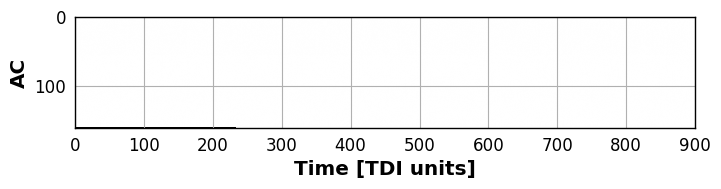

In [33]:
# Rotate and Strech color
import scipy
from scipy import ndimage
nlines=900
rotated_img = scipy.ndimage.rotate(image_data[-nlines:], 90)
plt.xlabel('Time [TDI units]')
plt.ylabel('AC')
plt.imshow(rotated_img, cmap='gray')


In [28]:
# Interactive Plot
plt.ion()
ax=plt.gca()
ax.imshow(rotated_img, cmap='gray', vmin=512, vmax=3000)
plt.xlabel('Time [TDI units]')
plt.ylabel('AC')
plt.draw()